# SkinCancer Image Classification using ViT (Vision Transformers and CNNs): Achieving SOTA in Vision Classification

Installing vit_pytorch released by @lucidrains on Github

In [1]:
pip install vit_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Importing Torch and Changing Device to GPU

In [2]:
import torch

In [3]:
# Check if GPU is available, otherwise fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Data visualization

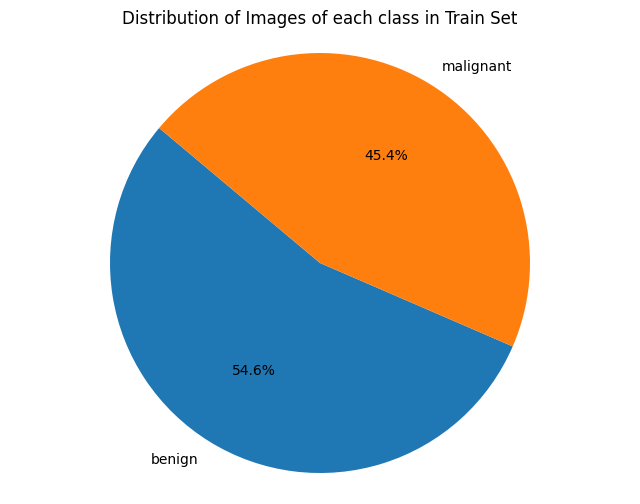

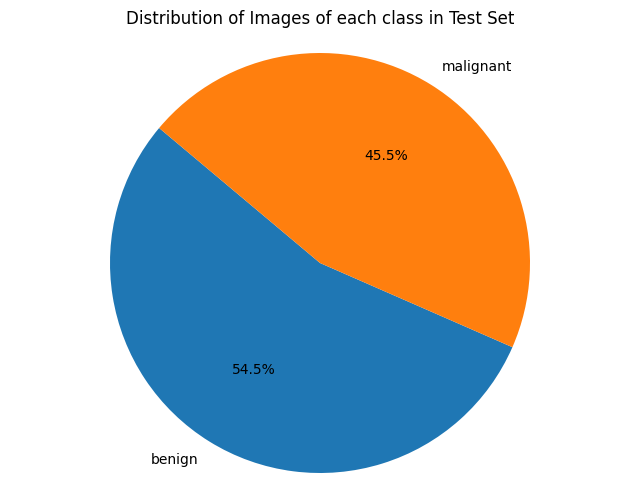

In [4]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(directory):
    classes = os.listdir(directory)
    class_counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

def plot_pie_chart(class_counts, setN):
    labels = class_counts.keys()
    sizes = class_counts.values()

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Distribution of Images of each class in {setN} Set')
    plt.show()

# Example usage
directory = "/kaggle/input/skin-cancer-malignant-vs-benign/train"
class_counts = count_images_in_classes(directory)
plot_pie_chart(class_counts, setN="Train")

directory2 = "/kaggle/input/skin-cancer-malignant-vs-benign/test"
class_counts2 = count_images_in_classes(directory2)
plot_pie_chart(class_counts2, setN="Test")

# Data Augmentation

In [5]:
import os
import random
import shutil
from PIL import Image
from torchvision import transforms

def augment_image(image_path, output_dir, prefix='', num_augmentations=5):
    image = Image.open(image_path)
    image_name = os.path.basename(image_path)
    
    # Save original image
    original_image_path = os.path.join(output_dir, prefix + image_name)
    image.save(original_image_path)
    
    # Define transformations for augmentation
    transformations = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.RandomPerspective(),
    ])
    
    # Augment and save the image
    for i in range(num_augmentations):
        augmented_image = transformations(image)
        augmented_image_name = f"{prefix}{i+1}_{image_name}"
        augmented_image_path = os.path.join(output_dir, augmented_image_name)
        augmented_image.save(augmented_image_path)

def balance_dataset(input_dir, output_dir):
    # Create output directories if they don't exist
    for subdir in ['benign', 'malignant']:
        os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)
    
    # Count the number of samples in each class
    benign_images = [f for f in os.listdir(os.path.join(input_dir, 'benign')) if f.endswith('.jpg')]
    malignant_images = [f for f in os.listdir(os.path.join(input_dir, 'malignant')) if f.endswith('.jpg')]
    
    num_benign = len(benign_images)
    num_malignant = len(malignant_images)
    
    # Calculate the augmentation factor
    augmentation_factor = max(num_benign, num_malignant) // min(num_benign, num_malignant)
    
    # Augment both classes
    for image_name in benign_images:
        image_path = os.path.join(input_dir, 'benign', image_name)
        augment_image(image_path, os.path.join(output_dir, 'benign'), prefix='', num_augmentations=augmentation_factor)
    
    for image_name in malignant_images:
        image_path = os.path.join(input_dir, 'malignant', image_name)
        augment_image(image_path, os.path.join(output_dir, 'malignant'), prefix='', num_augmentations=augmentation_factor)


input_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/train"
output_dir = "/kaggle/working/balanced_train"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

balance_dataset(input_dir, output_dir)

# Data visualization after data augmentation

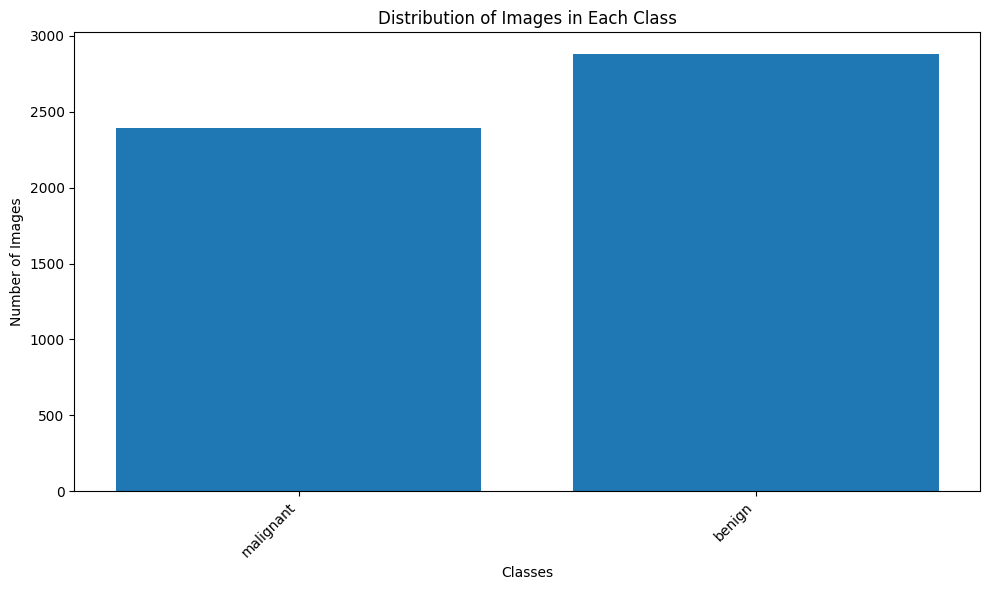

In [6]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(directory):
    classes = os.listdir(directory)
    class_counts = {}
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

def plot_histogram(class_counts):
    labels = class_counts.keys()
    sizes = class_counts.values()

    plt.figure(figsize=(10, 6))
    plt.bar(labels, sizes)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images in Each Class')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
directory = "/kaggle/working/balanced_train"
class_counts = count_images_in_classes(directory)
plot_histogram(class_counts)


## 5 random images from augmented data class "benign"

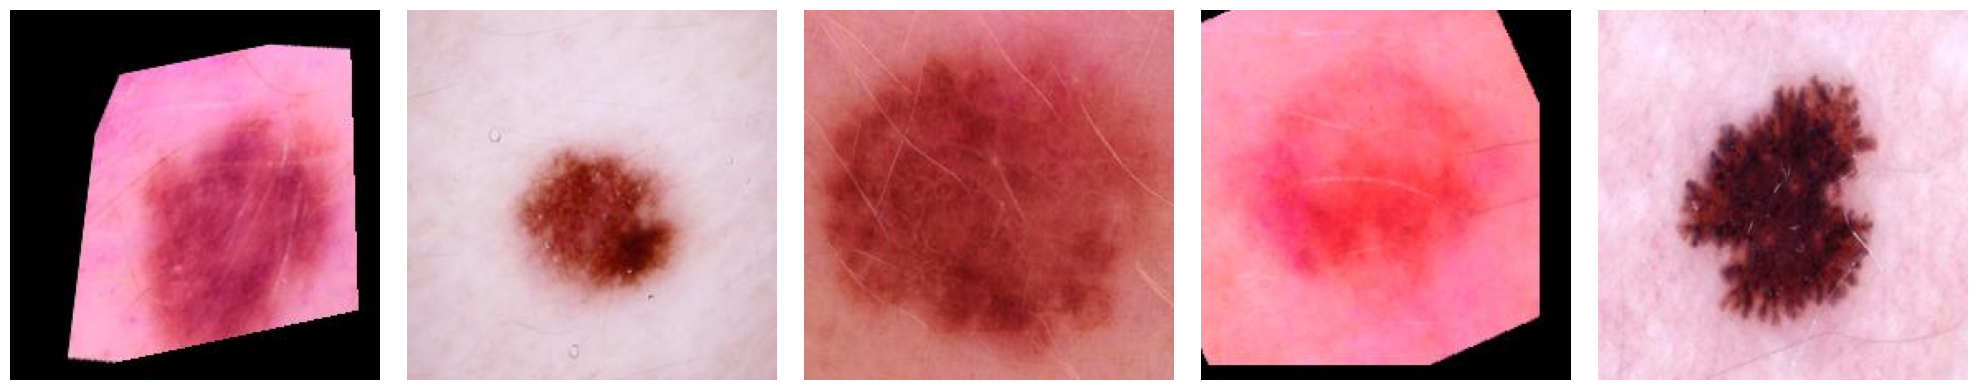

In [7]:
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

image_dir = "/kaggle/working/balanced_train/benign/"
image_files = os.listdir(image_dir)
random_image_files = random.sample(image_files, 5)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust figsize as needed

for i, image_file in enumerate(random_image_files):
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## 5 random images from augmented data class "malignant"

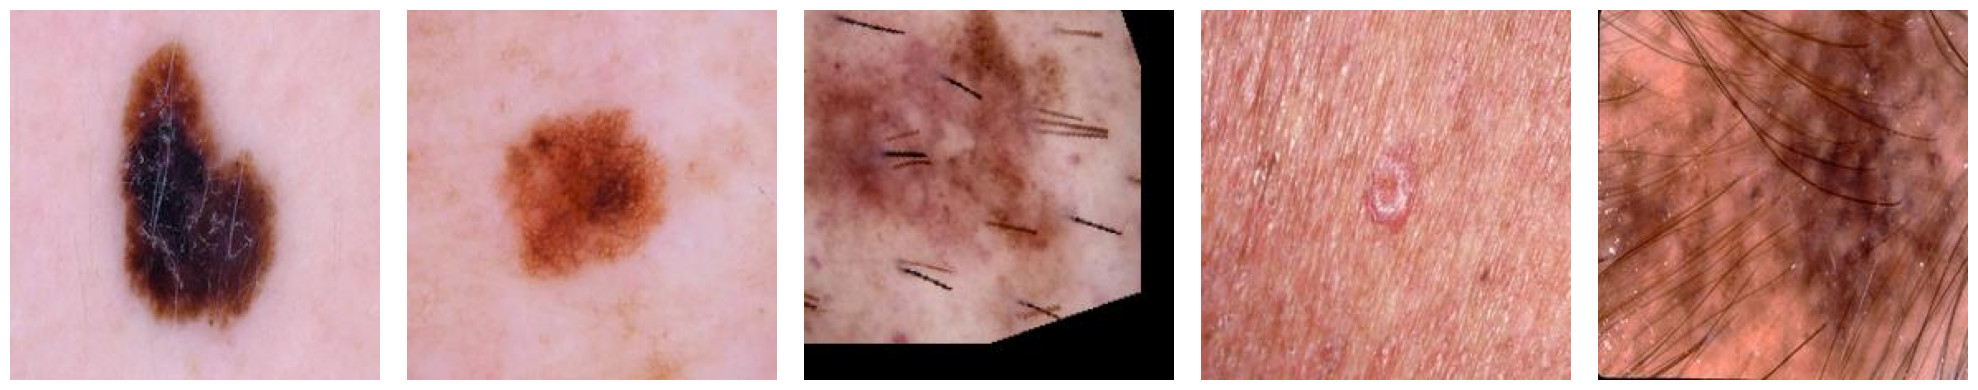

In [8]:
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

image_dir = "/kaggle/working/balanced_train/malignant/"
image_files = os.listdir(image_dir)
random_image_files = random.sample(image_files, 5)

fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust figsize as needed

for i, image_file in enumerate(random_image_files):
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## Loading data into memory. Images + Respective Labels

In [9]:
import os
from PIL import Image
import numpy as np
import torch

def load_SkinCancer_dataset(dataset_dir, batch_size=32, device='cuda'):
    class_names = sorted(os.listdir(dataset_dir))
    images = []
    labels = []

    # Iterate over each class folder
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        image_names = os.listdir(class_dir)
        num_images = len(image_names)
        num_batches = (num_images + batch_size - 1) // batch_size

        print(f"Loading {num_images} images from class {class_name}...")

        # Iterate over each batch of images
        for batch_idx in range(num_batches):
            batch_image_names = image_names[batch_idx * batch_size : (batch_idx + 1) * batch_size]
            batch_images = []
            batch_labels = []

            # Load and preprocess each image in the batch
            for image_name in batch_image_names:
                image_path = os.path.join(class_dir, image_name)
                try:
                    image = Image.open(image_path)
                    image = image.resize((256, 256))  # Resize image to desired size
                    image = np.array(image) / 255.0  # Normalize pixel values
                    batch_images.append(image)
                    batch_labels.append(i)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

            # Append batch to images and labels lists
            if batch_images:
                images.append(np.array(batch_images))
                labels.append(np.array(batch_labels))
        print(f"Done Loading {num_images} images from class {class_name}...")
    # Concatenate batches into single arrays
    images = np.concatenate(images, axis=0)
    labels = np.concatenate(labels, axis=0)
    images = torch.tensor(np.transpose(images, (0, 3, 1, 2)), dtype=torch.float32).to(device)
    labels = torch.tensor(labels, dtype=torch.long).to(device)
    
    print("==============\nDone loading all images and labels in memory\n==============")

    return images, labels


1. augmented train directory
1. normal train directory
1. test directory

In [10]:
# Define dataset directories
aug_train_dataset_dir = "/kaggle/working/balanced_train"
train_dataset_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/train"
test_dataset_dir = "/kaggle/input/skin-cancer-malignant-vs-benign/test"

print("\n========= Loading Augmented Train Dataset =========\n")

# Load train dataset
images_train, labels_train = load_SkinCancer_dataset(aug_train_dataset_dir)

print("\n========= Loading Train Dataset =========\n")

# Load train dataset
images_train2, labels_train2 = load_SkinCancer_dataset(train_dataset_dir)

print("\n========= Loading Test Dataset =========\n")

# Load test dataset
images_test, labels_test = load_SkinCancer_dataset(test_dataset_dir)


========= Loading Augmented Train Dataset =========

Loading 2880 images from class benign...
Done Loading 2880 images from class benign...
Loading 2394 images from class malignant...
Done Loading 2394 images from class malignant...
Done loading all images and labels in memory

========= Loading Train Dataset =========

Loading 1440 images from class benign...
Done Loading 1440 images from class benign...
Loading 1197 images from class malignant...
Done Loading 1197 images from class malignant...
Done loading all images and labels in memory

========= Loading Test Dataset =========

Loading 360 images from class benign...
Done Loading 360 images from class benign...
Loading 300 images from class malignant...
Done Loading 300 images from class malignant...
Done loading all images and labels in memory


# Importing Libraries

In [11]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageNet
from torchvision.transforms import transforms
from torch.optim.lr_scheduler import StepLR
from vit_pytorch import ViT, deepvit
from torch.utils.data import Dataset, DataLoader

# Dataset class definition for SkinCancer dataset instance

In [14]:
class SkinCancer(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label

In [15]:
# Create Skin Cancer train and non augmented train dataset instance
sc_train = SkinCancer(images_train, labels_train)
sc_train_non_aug = SkinCancer(images_train2, labels_train2)

In [16]:
# Create Skin Cancer test dataset instance
sc_test = SkinCancer(images_test, labels_test)

In [17]:
# Create data loaders for each split
train_loader = DataLoader(sc_train, batch_size=32, shuffle=True)
non_aug_train_loader = DataLoader(sc_train_non_aug, batch_size=32, shuffle=True)
test_loader = DataLoader(sc_test, batch_size=32)

# Model definition. Note:- This model is not a pre-trained model

### Base Vision Transformer

In [18]:
v = ViT(
    image_size = 256,
    channels = 3,
    patch_size = 32,
    num_classes = 2,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.5,
    emb_dropout = 0.5
).to(device)

non_aug_v = ViT(
    image_size = 256,
    channels = 3,
    patch_size = 32,
    num_classes = 2,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.5,
    emb_dropout = 0.5
).to(device)

### Deep Vision Transformer

In [19]:
deepv = deepvit.DeepViT(
    image_size = 256,
    channels = 3,
    patch_size = 32,
    num_classes = 2,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.5,
    emb_dropout = 0.5
).to(device)

non_aug_deepv = deepvit.DeepViT(
    image_size = 256,
    channels = 3,
    patch_size = 32,
    num_classes = 2,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.5,
    emb_dropout = 0.5
).to(device)

# Defining loss and optimizer

In [20]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(v.parameters(), lr=0.0001)
optimizer2 = optim.Adam(deepv.parameters(), lr=0.0001)

# Training Loop

In [21]:
from tqdm import tqdm

In [22]:
num_epochs = 15

# Augmented Dataset
---------

# Base ViT

In [23]:
# Lists to store test loss and accuracy
train_loss_history = []
train_accuracy_history = []

# Training loop
for epoch in range(num_epochs):
    v.train() # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer.zero_grad()  # Clear gradients
        outputs = v(images)  # Forward pass
        loss1 = criterion(outputs, labels)
        total_loss = loss1 
        total_loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters
        running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    print(f'Training: Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy * 100:.2f}%')

Training: Epoch 1/15, Loss: 0.6794, Accuracy: 61.95%


Training: Epoch 2/15, Loss: 0.5979, Accuracy: 68.05%


Training: Epoch 3/15, Loss: 0.5625, Accuracy: 71.01%


Training: Epoch 4/15, Loss: 0.5076, Accuracy: 74.52%


Training: Epoch 5/15, Loss: 0.4917, Accuracy: 75.27%


Training: Epoch 6/15, Loss: 0.4716, Accuracy: 76.70%


Training: Epoch 7/15, Loss: 0.4611, Accuracy: 77.34%


Training: Epoch 8/15, Loss: 0.4470, Accuracy: 78.40%


Training: Epoch 9/15, Loss: 0.4382, Accuracy: 78.97%


Training: Epoch 10/15, Loss: 0.4271, Accuracy: 79.41%


Training: Epoch 11/15, Loss: 0.4187, Accuracy: 80.57%


Training: Epoch 12/15, Loss: 0.4080, Accuracy: 80.77%


Training: Epoch 13/15, Loss: 0.4047, Accuracy: 81.25%


Training: Epoch 14/15, Loss: 0.3873, Accuracy: 81.70%


Training: Epoch 15/15, Loss: 0.3837, Accuracy: 82.21%


## Plotting training loss curve on augmented dataset

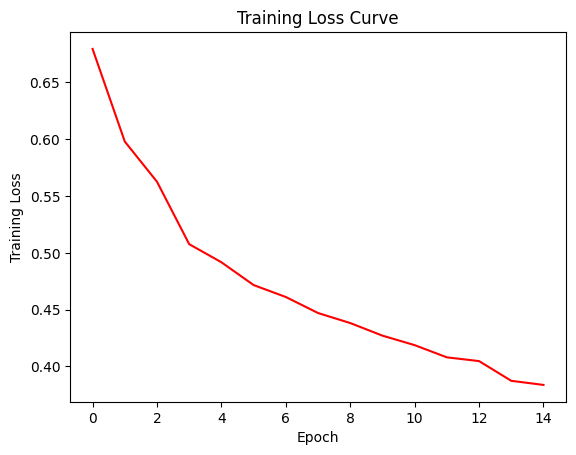

In [24]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, train_loss_history, color="red")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

## Plotting training accuracy curve on augmented dataset

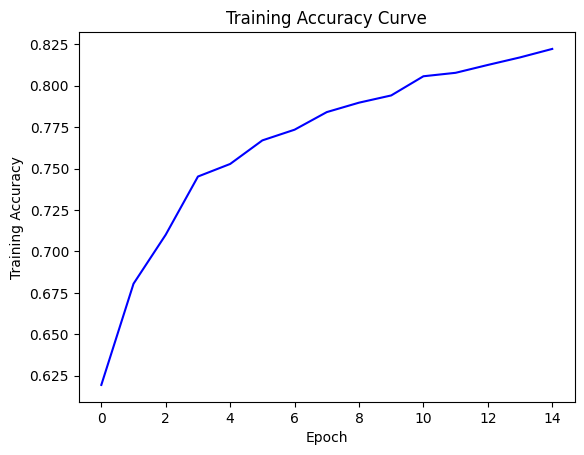

In [25]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, train_accuracy_history, color="blue")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

---

# Deep ViT

In [32]:
# Lists to store test loss and accuracy
train_loss_history_deepv = []
train_accuracy_history_deepv = []

# Training loop
for epoch in range(num_epochs):
    v.train() # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer.zero_grad()  # Clear gradients
        outputs = deepv(images)  # Forward pass
        loss1 = criterion(outputs, labels)
        total_loss = loss1 
        total_loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters
        running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    train_loss_history_deepv.append(epoch_loss)
    train_accuracy_history_deepv.append(epoch_accuracy)
    print(f'Training: Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy * 100:.2f}%')

Training: Epoch 1/15, Loss: 0.7322, Accuracy: 51.14%


Training: Epoch 2/15, Loss: 0.7372, Accuracy: 50.99%


Training: Epoch 3/15, Loss: 0.7376, Accuracy: 50.59%


Training: Epoch 4/15, Loss: 0.7307, Accuracy: 51.54%


Training: Epoch 5/15, Loss: 0.7375, Accuracy: 50.80%


Training: Epoch 6/15, Loss: 0.7319, Accuracy: 51.92%


Training: Epoch 7/15, Loss: 0.7363, Accuracy: 51.02%


Training: Epoch 8/15, Loss: 0.7331, Accuracy: 51.44%


Training: Epoch 9/15, Loss: 0.7337, Accuracy: 50.93%


Training: Epoch 10/15, Loss: 0.7335, Accuracy: 51.33%


Training: Epoch 11/15, Loss: 0.7404, Accuracy: 50.40%


Training: Epoch 12/15, Loss: 0.7360, Accuracy: 50.09%


Training: Epoch 13/15, Loss: 0.7335, Accuracy: 50.57%


Training: Epoch 14/15, Loss: 0.7416, Accuracy: 50.44%


Training: Epoch 15/15, Loss: 0.7338, Accuracy: 51.31%


## Plotting training loss curve on augmented dataset

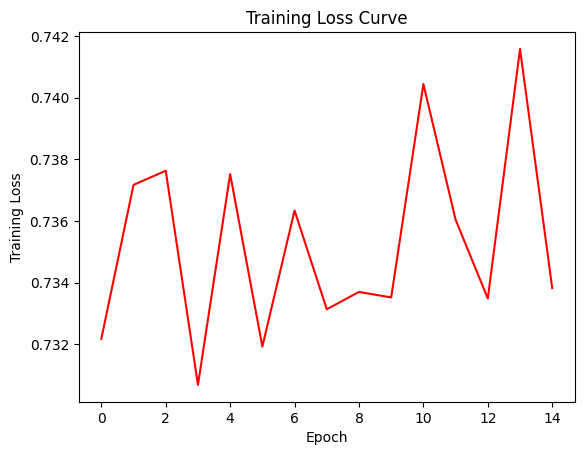

In [34]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, train_loss_history_deepv, color="red")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

## Plotting training accuracy curve on augmented dataset

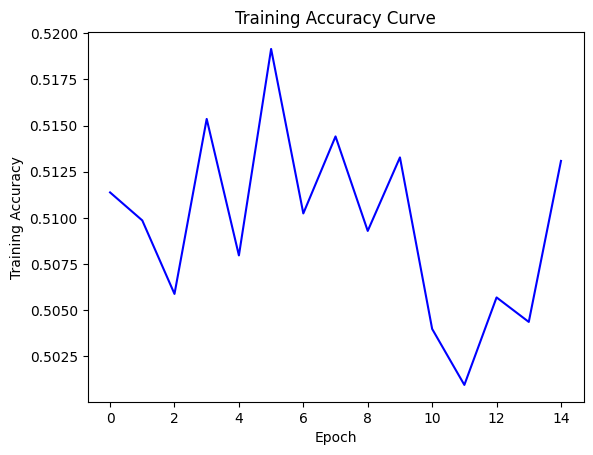

In [33]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, train_accuracy_history_deepv, color="blue")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

# Non augmented dataset
---

## Base Vision Transformer

In [26]:
# Lists to store test loss and accuracy
non_aug_train_loss_history = []
non_aug_train_accuracy_history = []

# Training loop
for epoch in range(num_epochs):
    non_aug_v.train() # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for images, labels in tqdm(non_aug_train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer.zero_grad()  # Clear gradients
        outputs = non_aug_v(images)  # Forward pass
        loss1 = criterion(outputs, labels)
        total_loss = loss1 
        total_loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters
        running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    non_aug_train_loss_history.append(epoch_loss)
    non_aug_train_accuracy_history.append(epoch_accuracy)
    print(f'Training: Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy * 100:.2f}%')

Training: Epoch 1/15, Loss: 0.3712, Accuracy: 50.44%


Training: Epoch 2/15, Loss: 0.3698, Accuracy: 50.82%


Training: Epoch 3/15, Loss: 0.3709, Accuracy: 51.04%


Training: Epoch 4/15, Loss: 0.3692, Accuracy: 51.31%


Training: Epoch 5/15, Loss: 0.3736, Accuracy: 49.79%


Training: Epoch 6/15, Loss: 0.3643, Accuracy: 52.64%


Training: Epoch 7/15, Loss: 0.3693, Accuracy: 52.18%


Training: Epoch 8/15, Loss: 0.3770, Accuracy: 49.03%


Training: Epoch 9/15, Loss: 0.3665, Accuracy: 50.66%


Training: Epoch 10/15, Loss: 0.3731, Accuracy: 51.35%


Training: Epoch 11/15, Loss: 0.3676, Accuracy: 52.22%


Training: Epoch 12/15, Loss: 0.3653, Accuracy: 51.76%


Training: Epoch 13/15, Loss: 0.3706, Accuracy: 50.25%


Training: Epoch 14/15, Loss: 0.3735, Accuracy: 49.60%


Training: Epoch 15/15, Loss: 0.3695, Accuracy: 51.42%


## Plotting training loss curve on non-augmented dataset

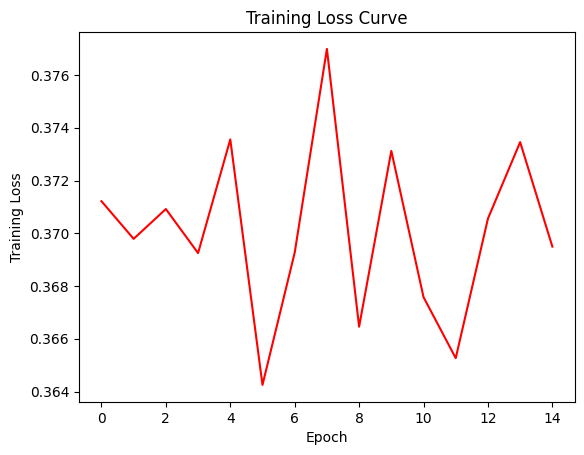

In [27]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, non_aug_train_loss_history, color="red")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

## Plotting training accuracy curve on non-augmented dataset

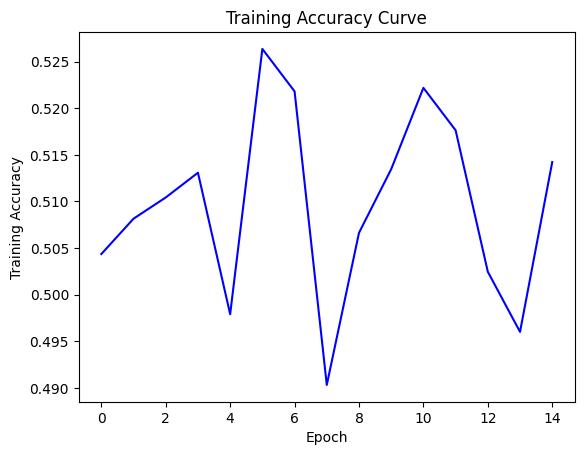

In [28]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, non_aug_train_accuracy_history, color="blue")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

# Deep vision transformer

In [29]:
# Lists to store train loss and accuracy
non_aug_train_loss_history_deepv = []
non_aug_train_accuracy_history_deepv = []

# Training loop
for epoch in range(num_epochs):
    non_aug_deepv.train() # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        optimizer2.zero_grad()  # Clear gradients
        outputs = non_aug_deepv(images)  # Forward pass
        loss1 = criterion(outputs, labels)
        total_loss = loss1 
        total_loss.backward()  # Backpropagation
        optimizer2.step()  # Update model parameters
        running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    non_aug_train_loss_history_deepv.append(epoch_loss)
    non_aug_train_accuracy_history_deepv.append(epoch_accuracy)
    print(f'Training: Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy * 100:.2f}%')

Training: Epoch 1/15, Loss: 0.7279, Accuracy: 50.78%


Training: Epoch 2/15, Loss: 0.7295, Accuracy: 51.10%


Training: Epoch 3/15, Loss: 0.7343, Accuracy: 51.02%


Training: Epoch 4/15, Loss: 0.7234, Accuracy: 51.71%


Training: Epoch 5/15, Loss: 0.7226, Accuracy: 52.24%


Training: Epoch 6/15, Loss: 0.7307, Accuracy: 50.13%


Training: Epoch 7/15, Loss: 0.7330, Accuracy: 50.66%


Training: Epoch 8/15, Loss: 0.7213, Accuracy: 51.73%


Training: Epoch 9/15, Loss: 0.7263, Accuracy: 51.42%


Training: Epoch 10/15, Loss: 0.7352, Accuracy: 50.44%


Training: Epoch 11/15, Loss: 0.7386, Accuracy: 49.58%


Training: Epoch 12/15, Loss: 0.7388, Accuracy: 50.00%


Training: Epoch 13/15, Loss: 0.7332, Accuracy: 50.87%


Training: Epoch 14/15, Loss: 0.7317, Accuracy: 50.64%


Training: Epoch 15/15, Loss: 0.7258, Accuracy: 51.14%


## Plotting training loss curve on non-augmented dataset

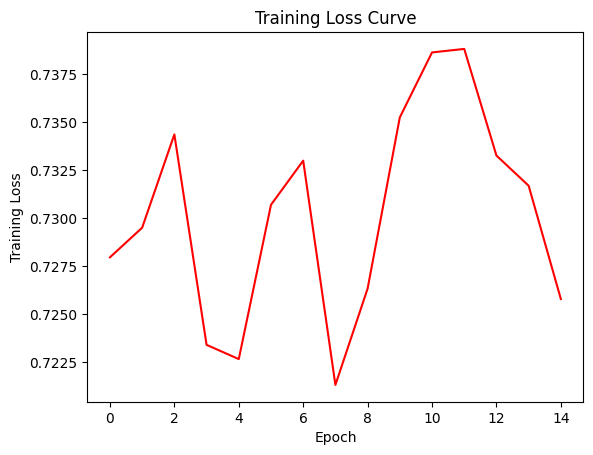

In [30]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, non_aug_train_loss_history_deepv, color="red")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.show()

## Plotting training accuracy curve on non-augmented dataset

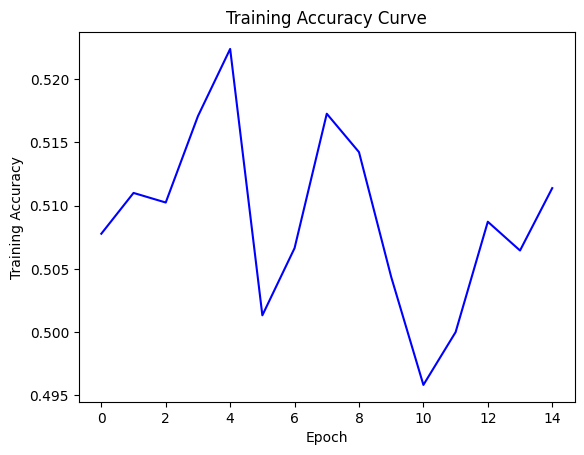

In [31]:
import matplotlib.pyplot as plt
epochs = list(range(0, num_epochs))
plt.plot(epochs, non_aug_train_accuracy_history_deepv, color="blue")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

# Testing Loop

### Base ViT Testing (Augemnted Dataset Trained Model)

In [35]:
# Lists to store predictions and ground truths
predictions = []
true_labels = []

# Testing loop
v.eval()  # Set model to evaluation mode
test_running_loss = 0.0
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        outputs = v(images)  # Forward pass
        predicted_labels = torch.argmax(outputs, dim=1)
        predictions.extend(predicted_labels.tolist())
        true_labels.extend(labels.tolist())
        loss1 = criterion(outputs, labels)  # Compute loss 1
        total_loss = loss1
        test_running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate test loss and accuracy for the current epoch
    test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

# Print test loss, accuracy, correct predictions, and total predictions
print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Correct Predictions: {correct}, Total Predictions: {total}')

Test Loss: 0.4155, Accuracy: 83.18%, Correct Predictions: 549, Total Predictions: 660


### Base ViT Testing (Non Augemnted Dataset Trained Model)

In [36]:
# Lists to store predictions and ground truths
predictions_non_aug = []
true_labels_non_aug = []

# Testing loop
non_aug_v.eval()  # Set model to evaluation mode
test_running_loss = 0.0
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        outputs = non_aug_v(images)  # Forward pass
        predicted_labels = torch.argmax(outputs, dim=1)
        predictions_non_aug.extend(predicted_labels.tolist())
        true_labels_non_aug.extend(labels.tolist())
        loss1 = criterion(outputs, labels)  # Compute loss 1
        total_loss = loss1
        test_running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate test loss and accuracy for the current epoch
    test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

# Print test loss, accuracy, correct predictions, and total predictions
print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Correct Predictions: {correct}, Total Predictions: {total}')

Test Loss: 0.6837, Accuracy: 64.55%, Correct Predictions: 426, Total Predictions: 660


### Deep ViT testing (Augmented Dataset Trained Model)

In [37]:
# Lists to store predictions and ground truths
predictions_deepv = []
true_labels_deepv = []

# Testing loop
deepv.eval()  # Set model to evaluation mode
test_running_loss = 0.0
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        outputs = deepv(images)  # Forward pass
        predicted_labels = torch.argmax(outputs, dim=1)
        predictions_deepv.extend(predicted_labels.tolist())
        true_labels_deepv.extend(labels.tolist())
        loss1 = criterion(outputs, labels)  # Compute loss 1
        total_loss = loss1
        test_running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate test loss and accuracy for the current epoch
    test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

# Print test loss, accuracy, correct predictions, and total predictions
print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Correct Predictions: {correct}, Total Predictions: {total}')

Test Loss: 0.6809, Accuracy: 48.33%, Correct Predictions: 319, Total Predictions: 660


### Deep ViT testing (Non Augmented Dataset Trained Model)

In [38]:
# Lists to store predictions and ground truths
predictions_deepv_non_aug = []
true_labels_deepv_non_aug = []

# Testing loop
non_aug_deepv.eval()  # Set model to evaluation mode
test_running_loss = 0.0
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for images, labels in tqdm(test_loader, desc='Testing', leave=False):
        outputs = non_aug_deepv(images)  # Forward pass
        predicted_labels = torch.argmax(outputs, dim=1)
        predictions_deepv_non_aug.extend(predicted_labels.tolist())
        true_labels_deepv_non_aug.extend(labels.tolist())
        loss1 = criterion(outputs, labels)  # Compute loss 1
        total_loss = loss1
        test_running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # Calculate test loss and accuracy for the current epoch
    test_loss = test_running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

# Print test loss, accuracy, correct predictions, and total predictions
print(f'Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%, Correct Predictions: {correct}, Total Predictions: {total}')

Test Loss: 0.6814, Accuracy: 55.76%, Correct Predictions: 368, Total Predictions: 660


# Confusion Matrices
---

In [39]:
import torchmetrics
import seaborn as sns
import matplotlib.pyplot as plt

### Base ViT confusion matrix (Augmented Dataset)

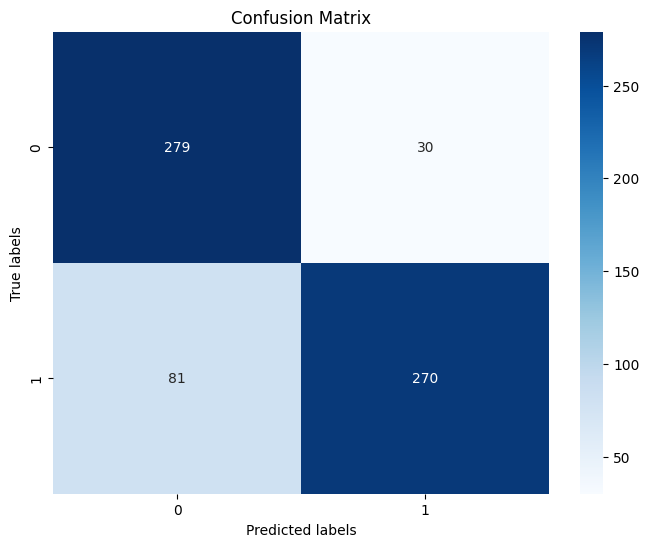

In [40]:
# Convert true labels and predictions to tensors
true_labels_tensor_v = torch.tensor(true_labels)
predictions_tensor_v = torch.tensor(predictions)

# Compute the confusion matrix
conf_matrix = torchmetrics.functional.confusion_matrix(true_labels_tensor_v, predictions_tensor_v, num_classes=2, task='MULTICLASS', normalize=None)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Base ViT confusion matrix (Non Augmented Dataset)

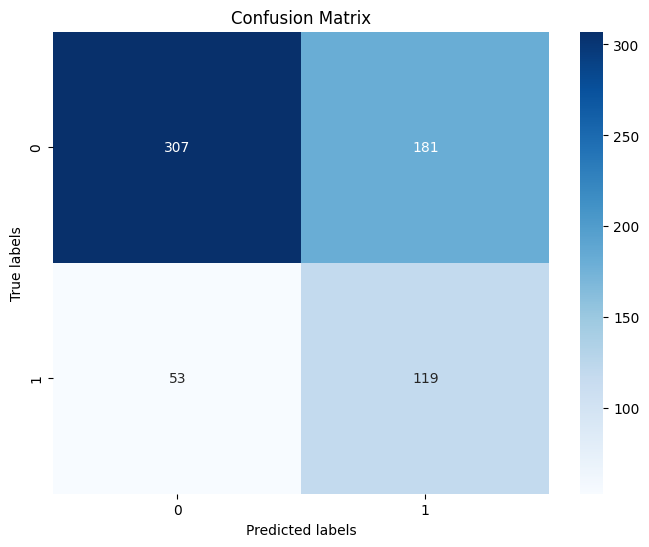

In [41]:
# Convert true labels and predictions to tensors
true_labels_tensor_v_non_aug = torch.tensor(true_labels_non_aug)
predictions_tensor_v_non_aug = torch.tensor(predictions_non_aug)

# Compute the confusion matrix
conf_matrix = torchmetrics.functional.confusion_matrix(true_labels_tensor_v_non_aug, predictions_tensor_v_non_aug, num_classes=2, task='MULTICLASS', normalize=None)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

---

### Deep ViT confusion matrix (Augmented Dataset)

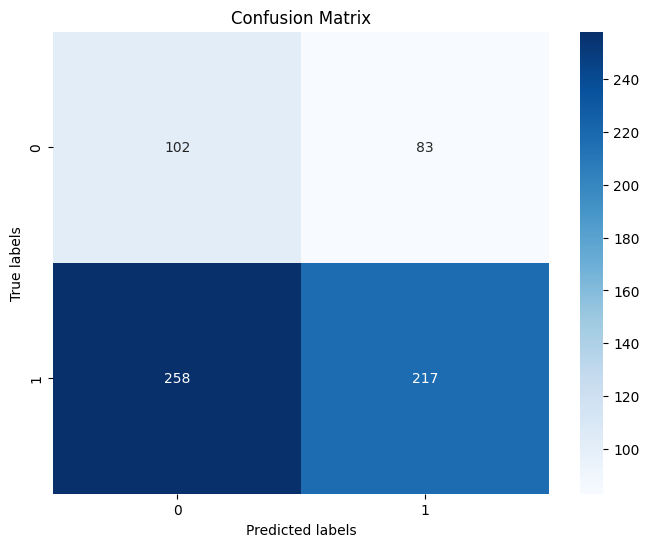

In [42]:
# Convert true labels and predictions to tensors
true_labels_tensor_deepv = torch.tensor(true_labels_deepv)
predictions_tensor_deepv = torch.tensor(predictions_deepv)

# Compute the confusion matrix
conf_matrix = torchmetrics.functional.confusion_matrix(true_labels_tensor_deepv, predictions_tensor_deepv, num_classes=2, task='MULTICLASS', normalize=None)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Deep ViT confusion matrix (Non Augmented Dataset)

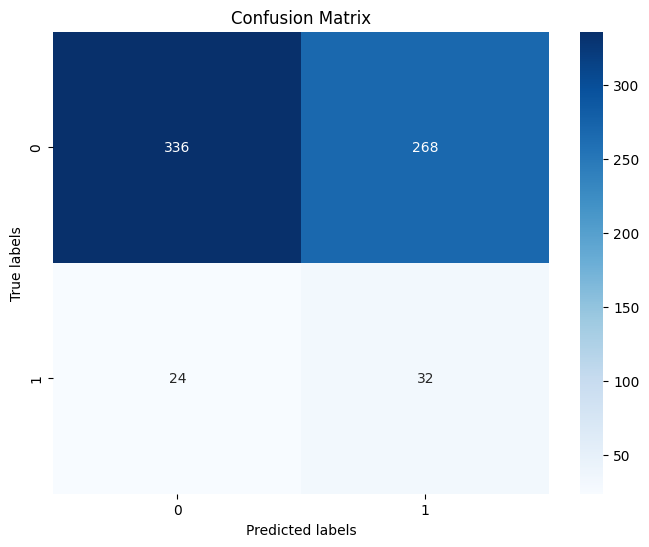

In [43]:
# Convert true labels and predictions to tensors
true_labels_tensor_deepv_non_aug = torch.tensor(true_labels_deepv_non_aug)
predictions_tensor_deepv_non_aug = torch.tensor(predictions_deepv_non_aug)

# Compute the confusion matrix
conf_matrix = torchmetrics.functional.confusion_matrix(true_labels_tensor_deepv_non_aug, predictions_tensor_deepv_non_aug, num_classes=2, task='MULTICLASS', normalize=None)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classifying images from a custom dataset. 

### Dataset was made combining random images from "bening" class and "malignant" into a single folder.
* 45-127 : Bening
* 185-247 : Malignant

## Base ViT (Augemnted Dataset Model)

In [44]:
import os
from PIL import Image
import torchvision.transforms as transforms

# Define the preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define the folder containing the images
folder_path = '/kaggle/input/skincancer-custom/custom_test'  # Replace with the path to the folder containing the images

# List to store results
results = []

# Iterate through all .jpg files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        # Load the image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)

        # Preprocess the image
        input_image = preprocess(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

        # Forward pass the preprocessed image through the model
        with torch.no_grad():
            v.eval()  # Set model to evaluation mode
            outputs = v(input_image)

        # Post-process the predicted output to get the final prediction result
        predicted_class = torch.argmax(outputs, dim=1).item()

        # Append the results to the list
        results.append((filename, predicted_class))

# Sort the results based on image names
results.sort(key=lambda x: x[0])

# Print the sorted results
for filename, predicted_class in results:
    print(f'Image: {filename}, Predicted class: {"Malignant" if predicted_class == 1 else "Benign"}')


Image: 105.jpg, Predicted class: Benign
Image: 119.jpg, Predicted class: Malignant
Image: 122.jpg, Predicted class: Benign
Image: 127.jpg, Predicted class: Benign
Image: 185.jpg, Predicted class: Malignant
Image: 186.jpg, Predicted class: Malignant
Image: 190.jpg, Predicted class: Malignant
Image: 193.jpg, Predicted class: Malignant
Image: 195.jpg, Predicted class: Malignant
Image: 196.jpg, Predicted class: Malignant
Image: 200.jpg, Predicted class: Malignant
Image: 208.jpg, Predicted class: Malignant
Image: 231.jpg, Predicted class: Malignant
Image: 232.jpg, Predicted class: Malignant
Image: 237.jpg, Predicted class: Malignant
Image: 238.jpg, Predicted class: Malignant
Image: 247.jpg, Predicted class: Benign
Image: 45.jpg, Predicted class: Benign
Image: 54.jpg, Predicted class: Benign
Image: 57.jpg, Predicted class: Benign
Image: 61.jpg, Predicted class: Malignant
Image: 63.jpg, Predicted class: Benign
Image: 71.jpg, Predicted class: Malignant
Image: 74.jpg, Predicted class: Benign
Im

From the above we can conclude that our model has an accuracy of: 93.54838709677419%
---------------------------------------------------------------------
Accuracy=(Total Number of Predictions / Number of Correct Predictions)×100%

---------------------------------------------------------------------

However, We can see that our Model confused in classifying 2 images (119.jpg and 186.jpg) and made in correct predictions.

119.jpg
* Correct Class: Benign
* Predicted Class: Malignant

186.jpg
* Correct Class: Malignant
* Predicted Class: Bening


# Visualizing Images

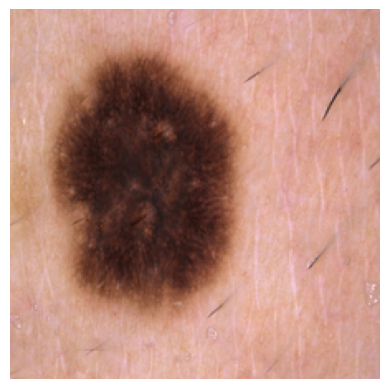

In [45]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/kaggle/input/skincancer-custom/custom_test/119.jpg" 
image = Image.open(image_path)


plt.imshow(image)
plt.axis('off')
plt.show()

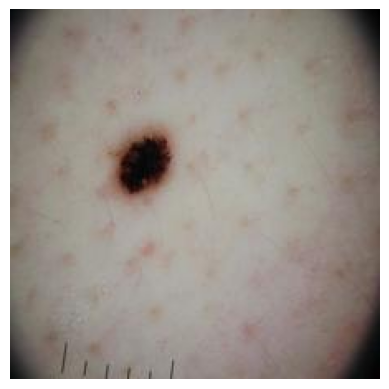

In [46]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = "/kaggle/input/skincancer-custom/custom_test/186.jpg"
image = Image.open(image_path)


plt.imshow(image)
plt.axis('off')
plt.show()

# We can conclude that our model confuses between the two due to their similarity in discoloration of the skin